In [1]:
import warnings

warnings.filterwarnings('ignore')

import os

os.environ['http_proxy'] = "http://internet.ford.com:83" 
os.environ['https_proxy'] = "http://internet.ford.com:83" 

from player_client import PlayerClient

import nba_constants as c
import statsmodels.formula.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
import glob


# pc = PlayerClient()


In [2]:
season = c.SEASON_2022_2023

In [5]:
path = os.getcwd() + '/data'
csv_files = glob.glob(os.path.join(path, "*.csv"))

game_logs = pd.DataFrame()

for f in csv_files:
    df = pd.read_csv(f)
    game_logs = pd.concat([game_logs, df], ignore_index=True)

game_logs.to_csv('../data/2022-23_top_30_players_game_log', index=False)

game_logs = game_logs.sort_values(by=[c.GAME_DATE])
game_logs

KeyError: 'GAME_DATE'

In [67]:

# TODO: Make method for lag values by last game, last 5 games, last 10 games, etc.
game_logs[c.MIN_LAG] = game_logs.groupby(c.PLAYER_ID)[c.MIN].shift(1)
game_logs[c.PTS_LAG] = game_logs.groupby(c.PLAYER_ID)[c.PTS].shift(1)
game_logs[c.REB_LAG] = game_logs.groupby(c.PLAYER_ID)[c.REB].shift(1)
game_logs[c.AST_LAG] = game_logs.groupby(c.PLAYER_ID)[c.PTS].shift(1)
game_logs[c.STL_LAG] = game_logs.groupby(c.PLAYER_ID)[c.STL].shift(1)
game_logs[c.BLK_LAG] = game_logs.groupby(c.PLAYER_ID)[c.BLK].shift(1)
game_logs[c.TOV_LAG] = game_logs.groupby(c.PLAYER_ID)[c.TOV].shift(1)
game_logs[c.FG_PCT_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FG_PCT].shift(1)
game_logs[c.FGM_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FGM].shift(1)
game_logs[c.FGA_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FGA].shift(1)
game_logs[c.FG3M_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FG3M].shift(1)
game_logs[c.FG3A_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FG3A].shift(1)
game_logs[c.FG3_PCT_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FG3_PCT].shift(1)
game_logs[c.FTM_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FTM].shift(1)
game_logs[c.FTA_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FTA].shift(1)
game_logs[c.FT_PCT_LAG] = game_logs.groupby(c.PLAYER_ID)[c.FT_PCT].shift(1)
game_logs[c.PLUS_MINUS_LAG] = game_logs.groupby(c.PLAYER_ID)[c.PLUS_MINUS].shift(1)

game_logs = game_logs[[
    c.PTS, c.MIN_LAG, c.PTS_LAG, c.REB_LAG, c.AST_LAG, c.STL_LAG, c.BLK_LAG,
    c.TOV_LAG, c.FG_PCT_LAG, c.FGM_LAG, c.FGA_LAG, c.FG3M_LAG, c.FG3A_LAG, c.FG3_PCT_LAG, c.FTM_LAG, c.FTA_LAG,
    c.FT_PCT_LAG, c.PLUS_MINUS_LAG, c.OPP_W_PCT, c.OPP_E_OFF_RATING, c.OPP_E_DEF_RATING,
    c.OPP_E_NET_RATING, c.OPP_E_PACE, c.OPP_E_AST_RATIO, c.OPP_E_OREB_PCT, c.OPP_E_DREB_PCT, c.OPP_E_REB_PCT,
    c.OPP_E_TM_TOV_PCT,
]]

game_logs = game_logs.dropna()
game_logs

,PTS,MIN_LAG,PTS_LAG,REB_LAG,AST_LAG,STL_LAG,BLK_LAG,TOV_LAG,FG_PCT_LAG,FGM_LAG,...,OPP_W_PCT,OPP_E_OFF_RATING,OPP_E_DEF_RATING,OPP_E_NET_RATING,OPP_E_PACE,OPP_E_AST_RATIO,OPP_E_OREB_PCT,OPP_E_DREB_PCT,OPP_E_REB_PCT,OPP_E_TM_TOV_PCT
497,20,35.200000,31.0,15.0,31.0,0.0,0.0,5.0,0.462,12.0,...,0.537,112.4,112.0,0.3,100.2,17.5,0.229,0.766,0.501,0.141
304,15,37.266667,26.0,15.0,26.0,0.0,1.0,6.0,0.500,9.0,...,0.707,112.8,109.4,3.3,102.8,18.1,0.250,0.778,0.524,0.141
885,15,38.198333,21.0,1.0,21.0,2.0,0.0,1.0,0.500,8.0,...,0.707,112.8,109.4,3.3,102.8,18.1,0.250,0.778,0.524,0.141
1351,25,35.600000,27.0,6.0,27.0,4.0,1.0,3.0,0.455,10.0,...,0.537,112.4,112.0,0.3,100.2,17.5,0.229,0.766,0.501,0.141
751,28,38.566667,35.0,3.0,35.0,2.0,1.0,4.0,0.583,14.0,...,0.537,110.4,110.6,-0.2,98.6,17.8,0.228,0.777,0.492,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,4,23.950000,14.0,8.0,14.0,0.0,0.0,0.0,0.636,7.0,...,0.415,109.0,111.5,-2.4,101.7,17.0,0.238,0.777,0.507,0.148
1137,26,32.678333,25.0,7.0,25.0,2.0,1.0,5.0,0.571,8.0,...,0.402,112.0,116.0,-4.0,101.0,17.8,0.224,0.749,0.484,0.143
990,26,24.631667,33.0,5.0,33.0,2.0,0.0,0.0,0.520,13.0,...,0.512,111.8,109.9,1.9,101.4,18.5,0.247,0.774,0.511,0.143
1297,16,33.966667,14.0,21.0,14.0,0.0,3.0,1.0,0.333,4.0,...,0.451,112.7,113.8,-1.1,103.1,18.2,0.268,0.752,0.514,0.148


In [68]:
X, y = game_logs.drop(c.PTS, axis=1), game_logs[c.PTS]
# X.dtypes
cats = X.select_dtypes(exclude=np.number).columns.tolist()
for col in cats:
    X[col] = X[col].astype('category')

X.dtypes

MIN_LAG             float64
PTS_LAG             float64
REB_LAG             float64
AST_LAG             float64
STL_LAG             float64
BLK_LAG             float64
TOV_LAG             float64
FG_PCT_LAG          float64
FGM_LAG             float64
FGA_LAG             float64
FG3M_LAG            float64
FG3A_LAG            float64
FG3_PCT_LAG         float64
FTM_LAG             float64
FTA_LAG             float64
FT_PCT_LAG          float64
PLUS_MINUS_LAG      float64
OPP_W_PCT           float64
OPP_E_OFF_RATING    float64
OPP_E_DEF_RATING    float64
OPP_E_NET_RATING    float64
OPP_E_PACE          float64
OPP_E_AST_RATIO     float64
OPP_E_OREB_PCT      float64
OPP_E_DREB_PCT      float64
OPP_E_REB_PCT       float64
OPP_E_TM_TOV_PCT    float64
dtype: object

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

[0]	train-rmse:8.78112	validation-rmse:9.98801
[49]	train-rmse:1.73920	validation-rmse:10.76066


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

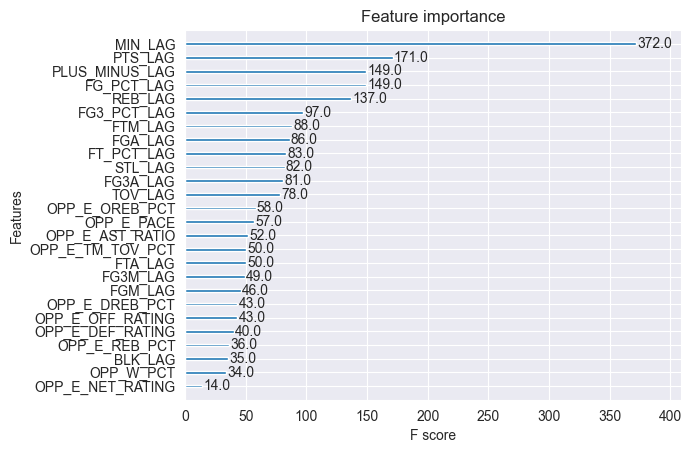

In [70]:
import xgboost as xgb
from xgboost import plot_importance


dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

params = {"objective": "reg:squarederror", "tree_method": "hist"}
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

n = 1000
model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=50,
    early_stopping_rounds=50
)

plot_importance(model)


In [71]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

rmse = mean_squared_error(y_test, preds, squared=False)
df = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
print(f"RMSE of the base model: {rmse:.3f}")
df

RMSE of the base model: 10.757


,Actual,Predicted
1011,31,22.277620
601,45,18.888639
721,29,30.879709
269,30,37.416553
1225,18,21.965921
...,...,...
666,36,24.055202
464,32,37.305458
1066,30,31.945120
1245,21,22.568327


In [72]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)
best_rmse = results['test-rmse-mean'].min()
print(f"Best RMSE: {best_rmse:.3f}")
results

Best RMSE: 9.405


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.642866,0.077589,9.418710,0.293103
1,8.103212,0.094110,9.405214,0.284334
